In [753]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [754]:
HSI_Raw = sc.io.loadmat("Data\sp100.mat")
print(HSI_Raw)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jan 09 11:02:37 2014', '__version__': '1.0', '__globals__': [], 'Y': array([[-0.00136637,  0.        , -0.00610936, ...,  0.00763582,
         0.00050221,  0.00593558],
       [ 0.0094474 ,  0.        , -0.0023535 , ...,  0.00052138,
         0.00104194, -0.00208496],
       [-0.00661816,  0.00022131,  0.00375484, ...,  0.00437265,
        -0.00546881,  0.00194789],
       ...,
       [ 0.00841139,  0.01395247,  0.0029267 , ..., -0.00417029,
         0.00711376, -0.00693965],
       [ 0.03047855,  0.02435916, -0.00761458, ..., -0.00362489,
         0.02497141,  0.00222761],
       [ 0.00238055,  0.02250305, -0.00699886, ..., -0.00087873,
         0.        , -0.00220022]])}


plotting

(98, 753)


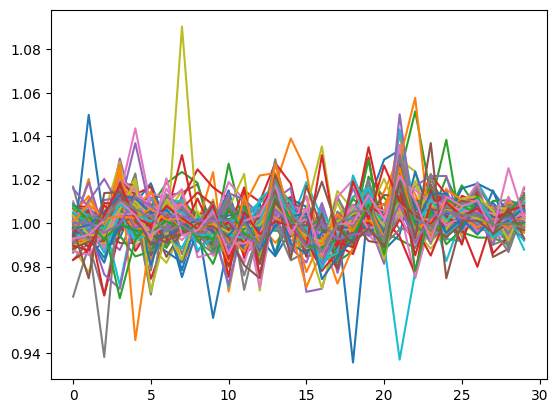

In [755]:
HSI = HSI_Raw['Y']
print(HSI.shape)
#read the last 30 days(from day -60 to day -30)
nb_days = HSI.shape[1]
nb_instances = HSI.shape[0]
HSI = np.exp(HSI)

HSI_train = HSI[: , 0:nb_days-30]
HSI_test = HSI[: , nb_days-30:nb_days]

plt.plot(HSI_test.T)

<b>GD

In [756]:
ones_array = np.ones((1, HSI_train.shape[1]))
con = np.concatenate((ones_array, HSI_train), axis=0)

print(con.shape)

(99, 723)


In [757]:
def calculate_variance(w):
    Wcn = w[1:len(w)]
    XWcn = HSI_test.T @ Wcn
    mean = np.mean(XWcn)
    print(mean)
    var = np.sum(np.square(XWcn - mean))/31
    return var

In [758]:
import numpy as np

C = cov = np.cov(con,bias=False)
n = C.shape[0]
mu = 0.01 # initial value of mu
beta = 0.9 #mu decreasing factor
alpha = 0.001 #learning rate
iterationsOuter = 100 # maximum number of iterations
iterationsinner = 100
toleranceInner = 1e-2 # the tolerance on W to stop the gradient
toleranceOuter = 1e-5
P = np.eye(n) - (1 / n) * np.ones((n, n)) # projection to isure the sum of W
Pinv = np.linalg.inv(P)

w = (1 / n) * np.ones(n)    #initialize W and concatinate a neutral element(to controle the scale of W)
A = P @ w + (1 / n) * np.ones(n)
steps = []
e = []
variances=[]
total_number_of_iterations = 0
for i in range(iterationsOuter): # outer loop (determines mu*)

    Ainio = A.copy()

    for j in range(iterationsinner):#inner loop determines A(mu)*
        #print("i = ",i,"|","j = ",j)
        #print("mean",np.mean(A))
        Ainii = A.copy()

        grad_quadratic = C @ A          
        grad_quadratic = grad_quadratic / np.linalg.norm(grad_quadratic)

        grad_barrier = -mu * np.reciprocal(A)
        grad_barrier = grad_barrier / np.linalg.norm(grad_barrier)
        
        #print("pen",grad_barrier)

        gradient = grad_quadratic + grad_barrier
        A = A - alpha * gradient
        
        #stop condition for inner loop
        dist = np.linalg.norm(Ainii - A)
        e.append(dist)
        #print("dist",dist)
        total_number_of_iterations +=1
        if(dist < toleranceInner * np.sqrt(n) ):
            print("inner loop stoped after j = ", j)
            break
    steps.append(np.mean(A))
    #update mu
    mu = mu * beta


    total_number_of_iterations +=1
    #stop condition for outer loop
    dist = np.linalg.norm(Ainio - A)
    variances.append(calculate_variance(w))
    if(dist < toleranceOuter * np.sqrt(n) ):
        print("outer loop stoped after i = ", i)
        break 
else:
    print("Reached the maximum number of iterations.")


print("iteration",i)
print("Final w_tilde:", w)
print(len(A))
print("total_number_of_iterations",total_number_of_iterations)

inner loop stoped after j =  0
0.9907324481981229
inner loop stoped after j =  0
0.9907324481981229
inner loop stoped after j =  0
0.9907324481981229
inner loop stoped after j =  0
0.9907324481981229
inner loop stoped after j =  0
0.9907324481981229
inner loop stoped after j =  0
0.9907324481981229
inner loop stoped after j =  0
0.9907324481981229
inner loop stoped after j =  0
0.9907324481981229
inner loop stoped after j =  0
0.9907324481981229
inner loop stoped after j =  0
0.9907324481981229
inner loop stoped after j =  0
0.9907324481981229
inner loop stoped after j =  0
0.9907324481981229
inner loop stoped after j =  0
0.9907324481981229
inner loop stoped after j =  0
0.9907324481981229
inner loop stoped after j =  0
0.9907324481981229
inner loop stoped after j =  0
0.9907324481981229
inner loop stoped after j =  0
0.9907324481981229
inner loop stoped after j =  0
0.9907324481981229
inner loop stoped after j =  0
0.9907324481981229
inner loop stoped after j =  0
0.9907324481981229


In [759]:
import numpy as np
import plotly.graph_objects as go

# Assuming steps and e are defined

# Plot for steps
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=list(range(0, len(steps))), y=steps, mode='lines', name='Steps'))

fig1.update_layout(title='Plot of Steps',
                   xaxis_title='Index',
                   yaxis_title='Steps Value',
                   showlegend=True)
fig1.show()

# Plot for error e
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=list(range(0, len(e))), y=e, mode='lines', name='Error'))
fig2.update_layout(title='Plot of Error',
                   xaxis_title='Index',
                   yaxis_title='Error Value',
                   yaxis=dict(type='log'),  # Set y-axis to logarithmic scale
                   showlegend=True)
fig2.show()


In [760]:
import numpy as np
from scipy.io import savemat

# Save e to a .mat file
savemat('advanced_e_sp100.mat', {'e': e})
print("Saved e to data_e.mat")

# Save e to a .mat file
savemat('advanced_variances_sp100.mat', {'e': variances })

Saved e to data_e.mat


[0.01010101 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101
 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101
 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101
 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101
 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101
 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101
 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101
 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101
 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101
 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101
 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101
 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101
 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101
 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101
 0.01010101 0.01010101 0.01010101 0.01010101 0.01010101 0.0101

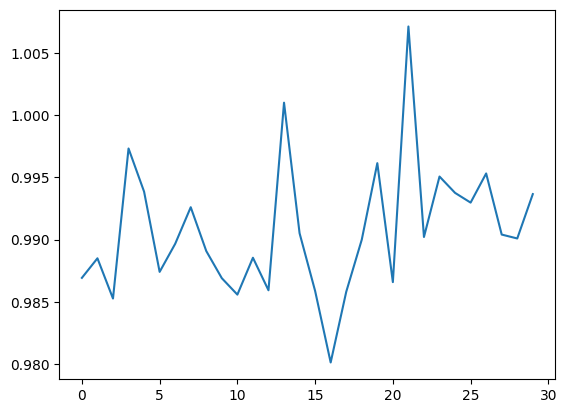

In [761]:
Wcn = w[1:len(w)]
print(Wcn)
print(np.sum(Wcn))
print(Wcn.shape)
print(HSI_test.shape)
print(Wcn.shape)

XWcn = HSI_test.T @ Wcn
plt.plot(XWcn)

In [762]:
mean = np.mean(XWcn)
print(mean)
var = np.sum(np.square(XWcn - mean))/31
print(var)

0.9907324481981229
2.689300360357597e-05
